# Explore here

In [3]:
# Your code here
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import math
# Cargar los datos desde la URL
url = "https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv"
datos = pd.read_csv(url, sep= ";")

# Mostrar las primeras filas del DataFrame
datos.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
datos.shape

(41188, 21)

In [5]:
datos.info

<bound method DataFrame.info of        age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact mo

In [6]:
datos.duplicated().sum()

np.int64(12)

In [7]:
data_limpio = datos.drop_duplicates()
print(data_limpio.shape)
data_limpio.head()

(41176, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
data_limpio = datos.drop(["nr.employed"], axis = 1, inplace = False)
data_limpio.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,no


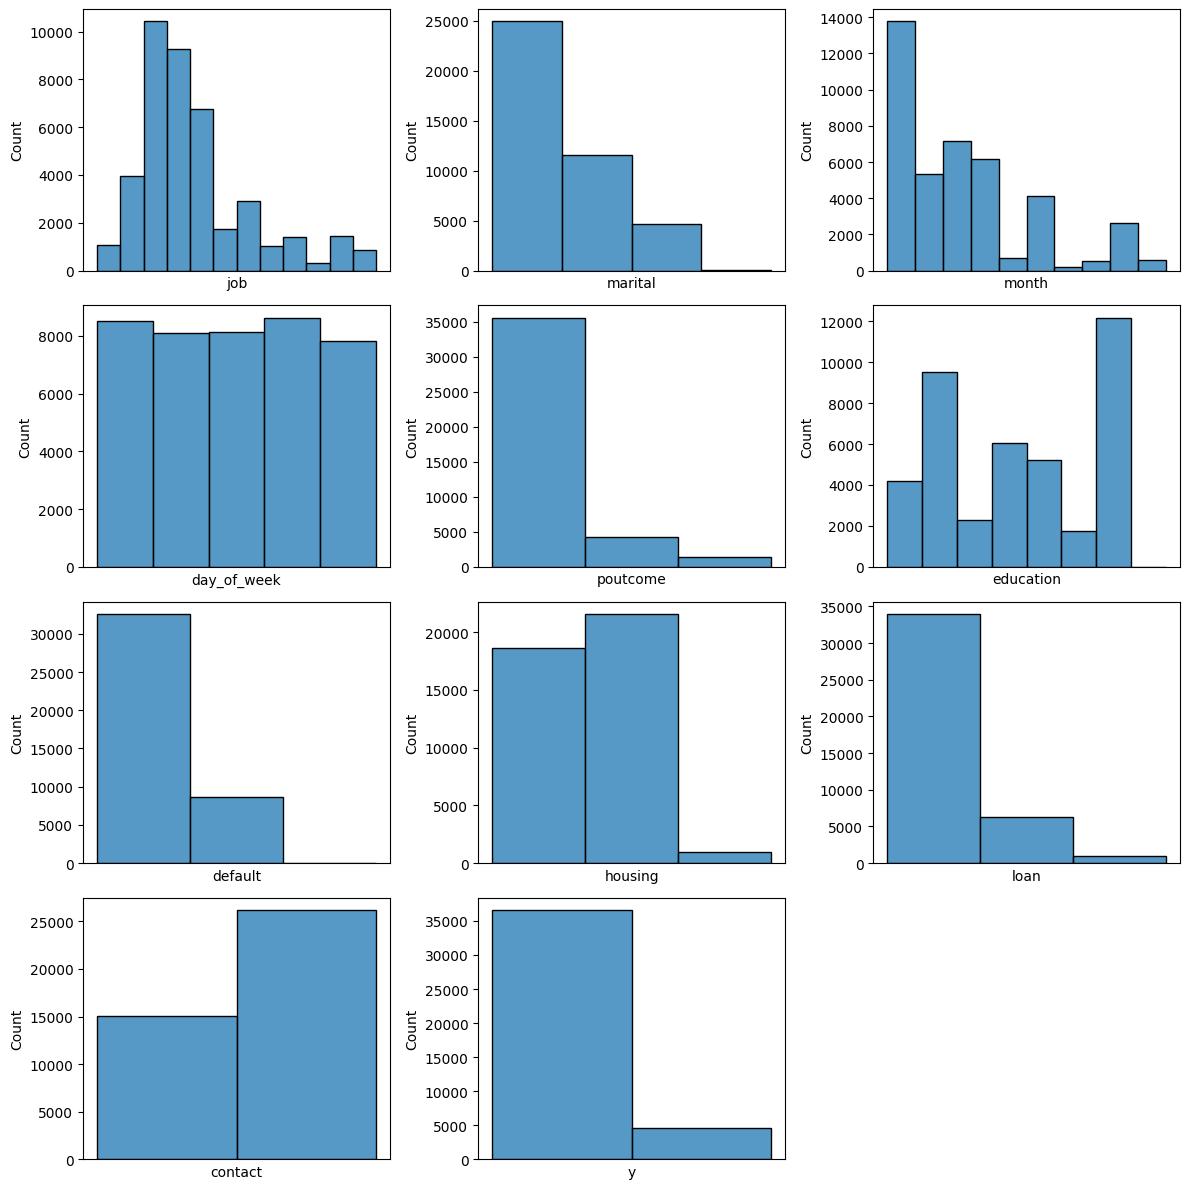

In [9]:
#Automatizacion Categoricos
columns = ["job", "marital","month", "day_of_week", "poutcome", "education", "default", "housing", "loan",	"contact", "y"]

# Calcular filas y columnas para organizar los gráficos en 3 por fila
num_cols = 3

num_rows = math.ceil(len(columns) / num_cols)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 3 * num_rows))

# Asegurar que axes es siempre una lista bidimensional
axes = axes.reshape(num_rows, num_cols) if num_rows > 1 else [axes]

# Generar los gráficos
col_index = 0
for row in range(num_rows):
    for col in range(num_cols):
        if col_index < len(columns):
            sns.histplot(data=data_limpio, x=columns[col_index], ax=axes[row][col])
            axes[row][col].set_xticks([])
            col_index += 1
        else:
            fig.delaxes(axes[row][col])  # Elimina gráficos vacíos
plt.tight_layout()
plt.show()



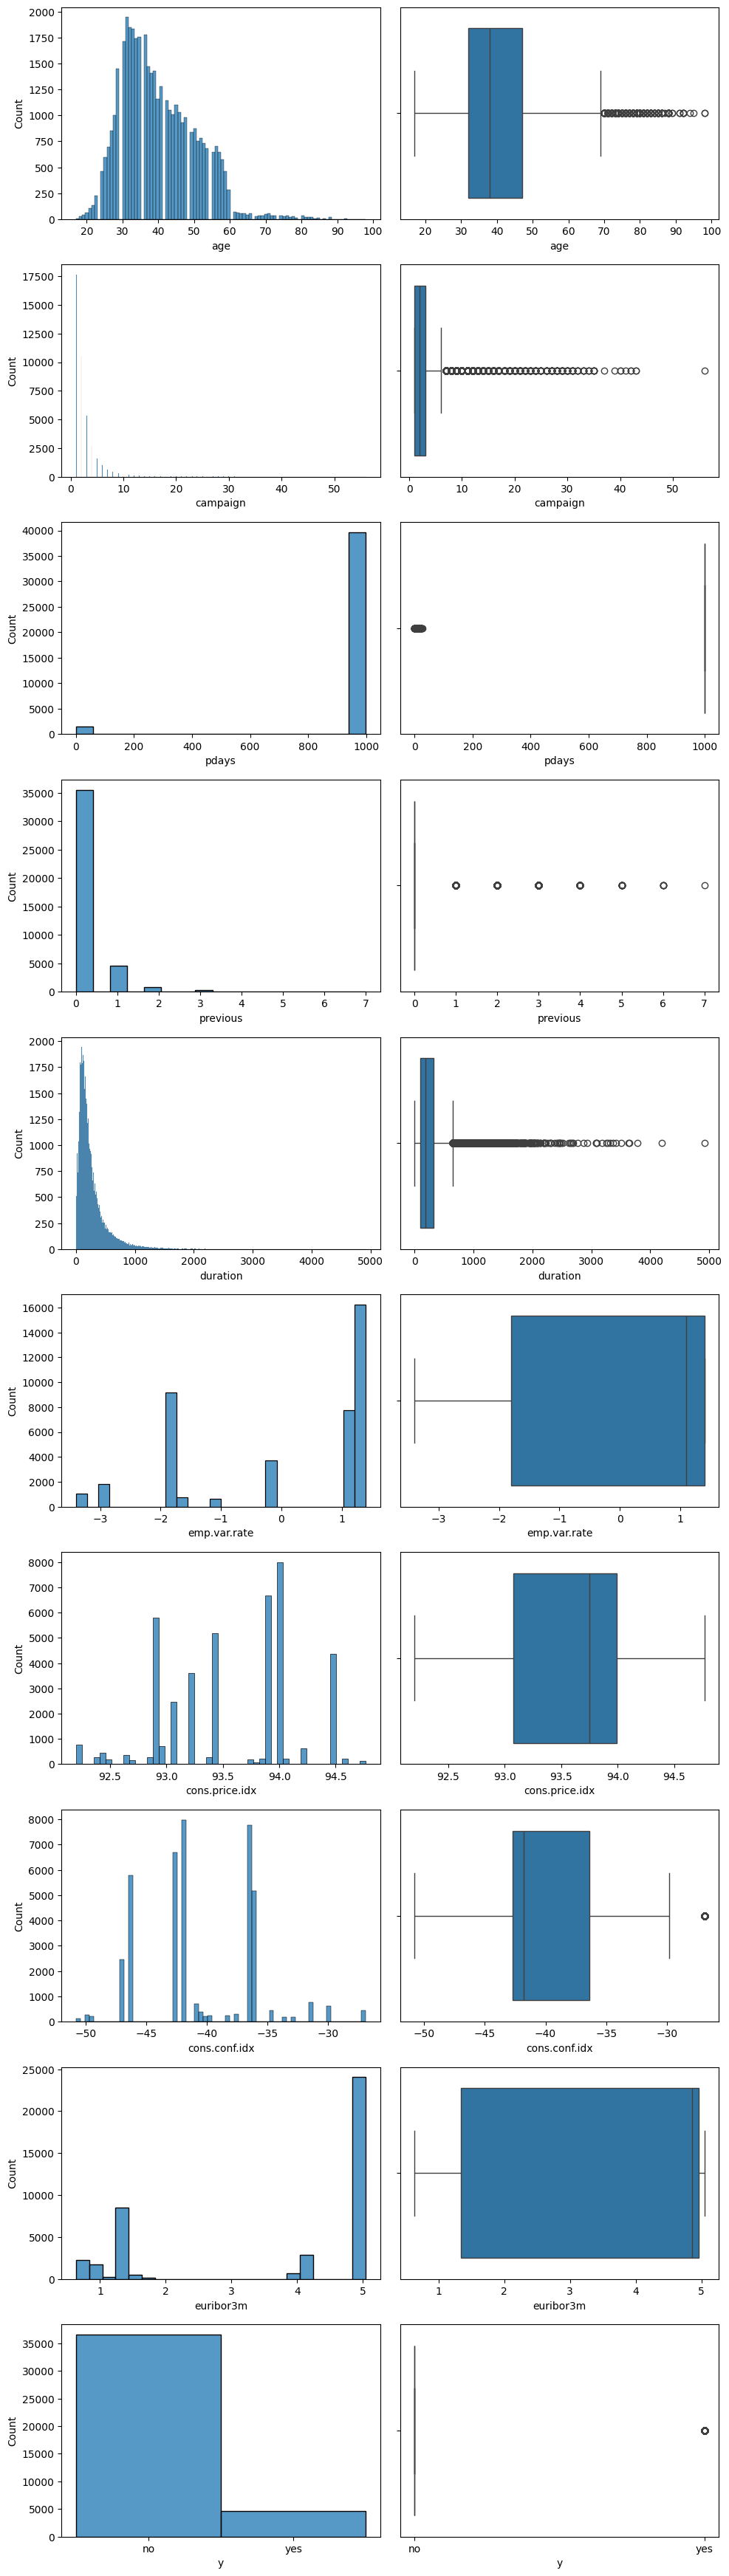

In [10]:
#Automatizacion Numerales
# Lista de columnas a graficar
columns = ["age", "campaign", "pdays", "previous","duration", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m","y"]

# Configurar la figura y los ejes con filas dinámicas
fig, axis = plt.subplots(len(columns), 2, figsize=(10, len(columns) * 3.5), gridspec_kw={"height_ratios": [6] * len(columns)})

# Recorrer las columnas y asignarlas a los ejes
for i, col in enumerate(columns):
    sns.histplot(ax=axis[i, 0], data=data_limpio, x=col)
    sns.boxplot(ax=axis[i, 1], data=data_limpio, x=col)
    
# Ajustar el diseño
plt.tight_layout()
# Mostrar los gráficos
plt.show()

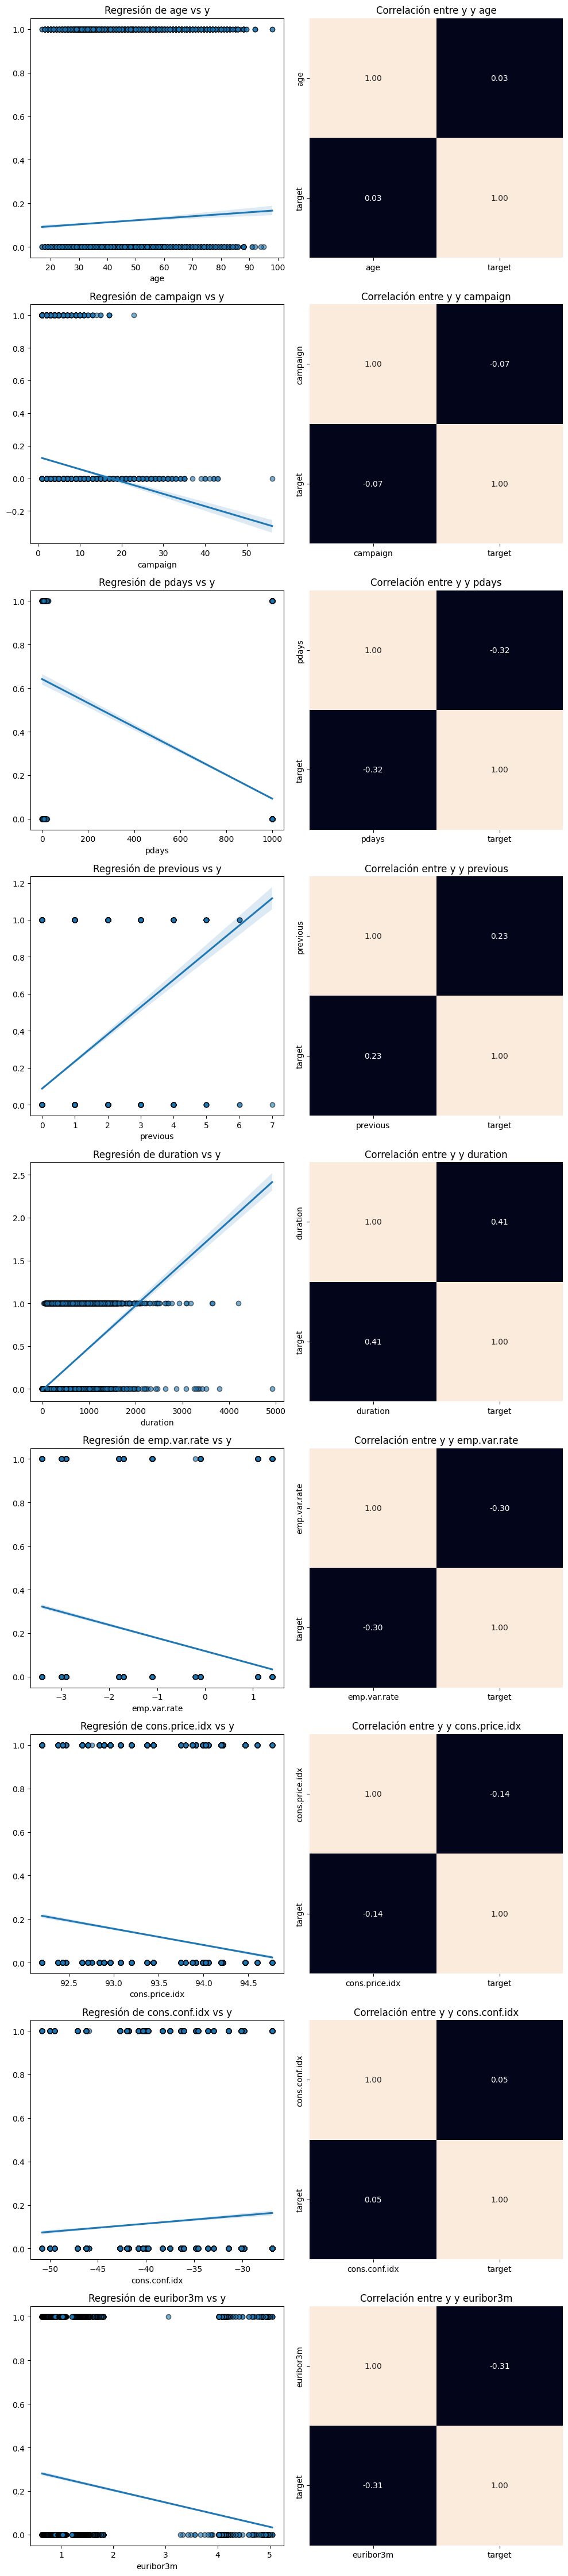

In [11]:
# # Automatizacion Numerico-Numerico

# Crear la variable objetivo (categórica)
target = data_limpio["y"]

# Factorizar el target y guardar el nombre de la columna
target_numeric = pd.factorize(target)[0]  # Convertir a valores numéricos
target_name = target.name  # Guardar el nombre de la columna original

# Variables numéricas
num_variables = ["age", "campaign", "pdays", "previous", "duration", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m"]

# Crear la figura y los ejes
num_rows = len(num_variables)
fig, axis = plt.subplots(num_rows, 2, figsize=(10, 5 * num_rows))

# Crear gráficos para cada variable
for i, var in enumerate(num_variables):
    # Scatterplot con regresión lineal
    sns.regplot(ax=axis[i, 0], data=data_limpio, x=var, y=target_numeric, scatter_kws={'edgecolor': 'k', 'alpha': 0.6})
    axis[i, 0].set_title(f"Regresión de {var} vs {target_name}")
    
    # Heatmap de correlación
    correlation_data = data_limpio[[var]].assign(target=target_numeric)  # Crear un DataFrame con la variable y el target
    sns.heatmap(correlation_data.corr(), annot=True, fmt=".2f", ax=axis[i, 1], cbar=False)
    axis[i, 1].set_title(f"Correlación entre {target_name} y {var}")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

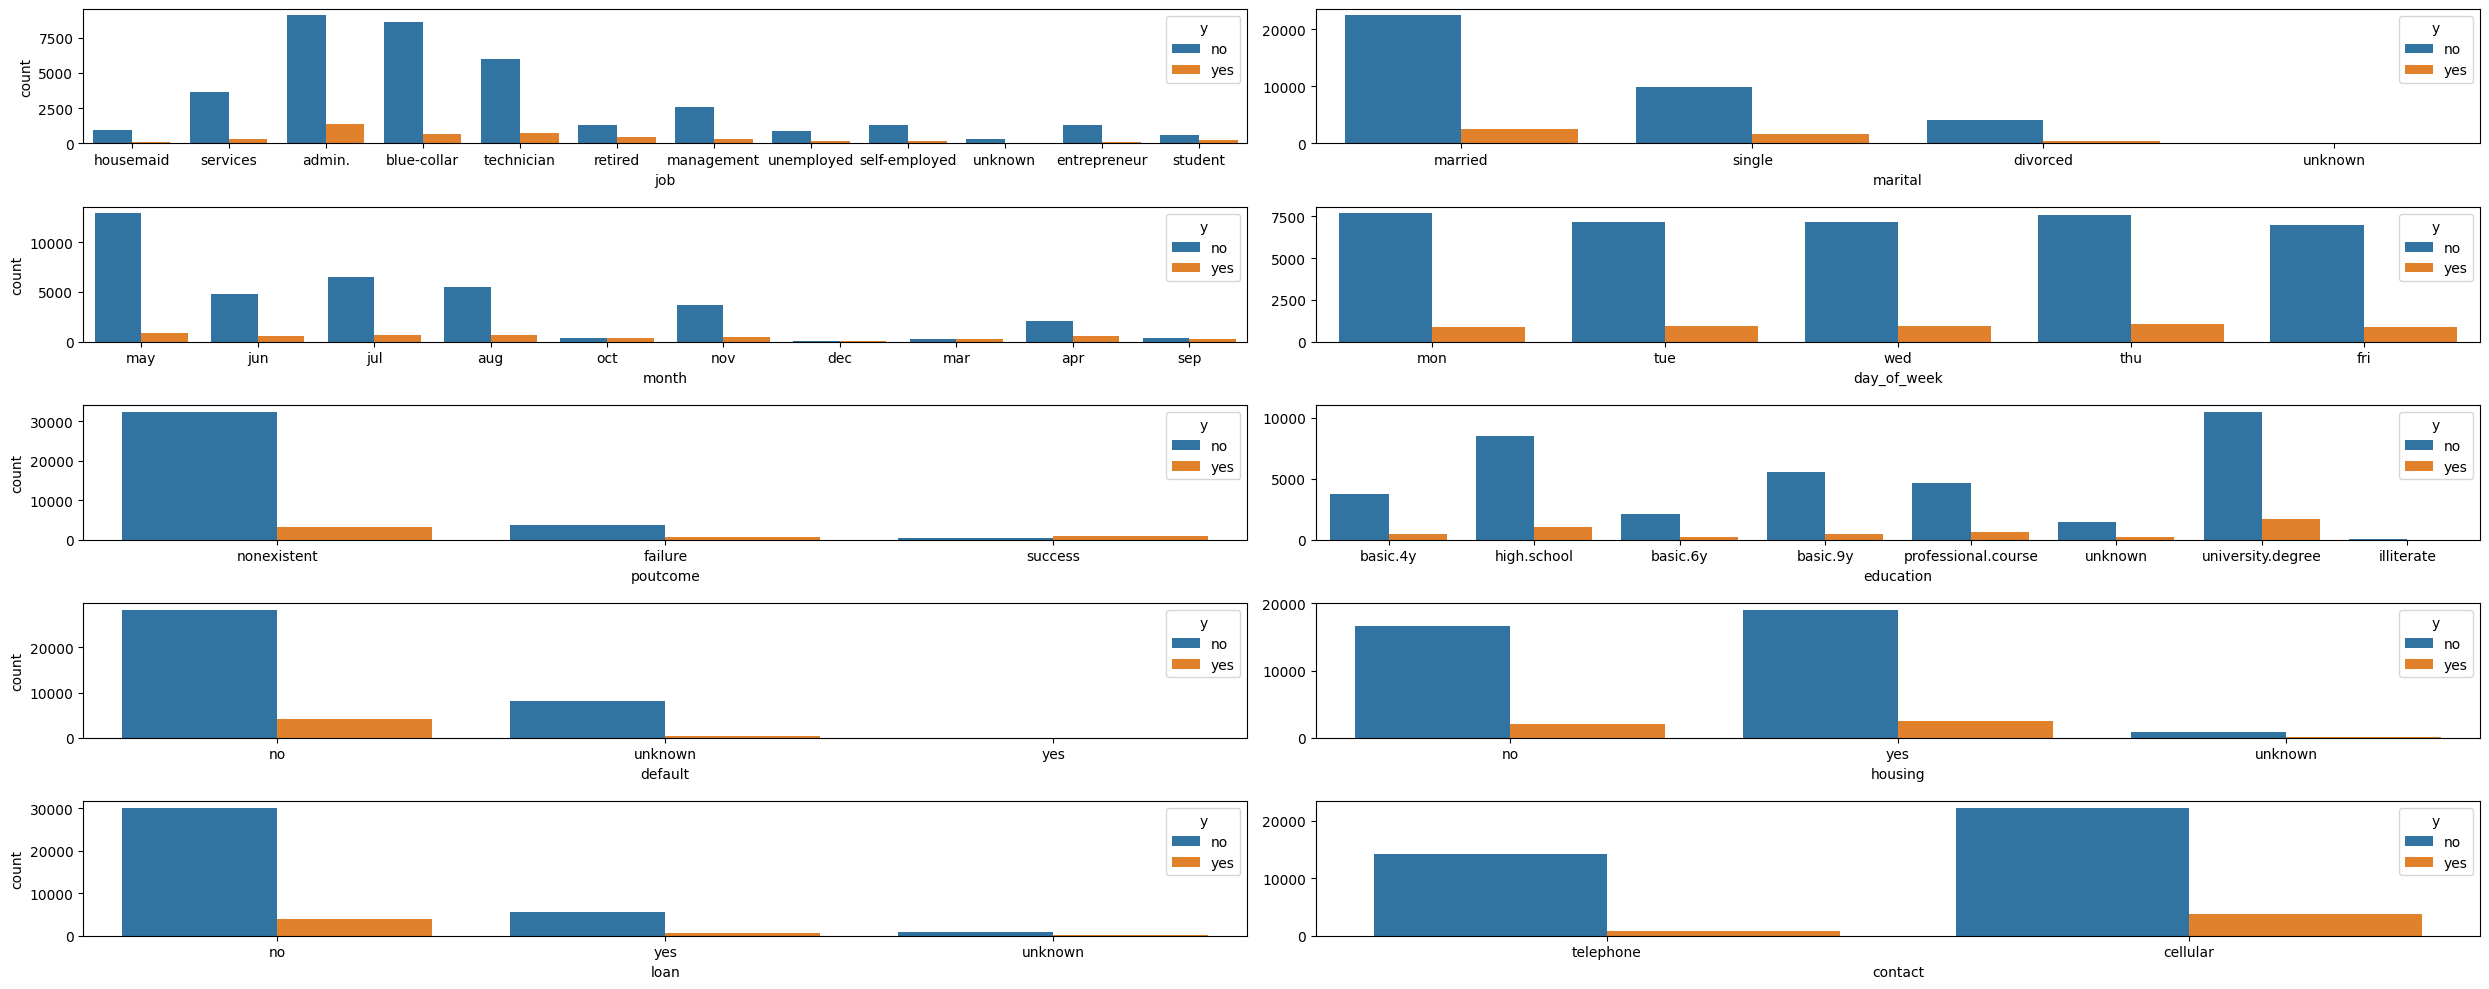

In [12]:
#Analisis categorico-categorico

fig, axis = plt.subplots(5, 2, figsize=(25, 10))

sns.countplot(ax=axis[0, 0], data=data_limpio, x="job", hue="y")
sns.countplot(ax=axis[0, 1], data=data_limpio, x="marital", hue="y").set(ylabel=None)
sns.countplot(ax=axis[1, 0], data=data_limpio, x="month", hue="y")
sns.countplot(ax=axis[1, 1], data=data_limpio, x="day_of_week", hue="y").set(ylabel=None)
sns.countplot(ax=axis[2, 0], data=data_limpio, x="poutcome", hue="y")
sns.countplot(ax=axis[2, 1], data=data_limpio, x="education", hue="y").set(ylabel=None)
sns.countplot(ax=axis[3, 0], data=data_limpio, x="default", hue="y")
sns.countplot(ax=axis[3, 1], data=data_limpio, x="housing", hue="y").set(ylabel=None)
sns.countplot(ax=axis[4, 0], data=data_limpio, x="loan", hue="y")
sns.countplot(ax=axis[4, 1], data=data_limpio, x="contact", hue="y").set(ylabel=None)



plt.tight_layout()
plt.show()


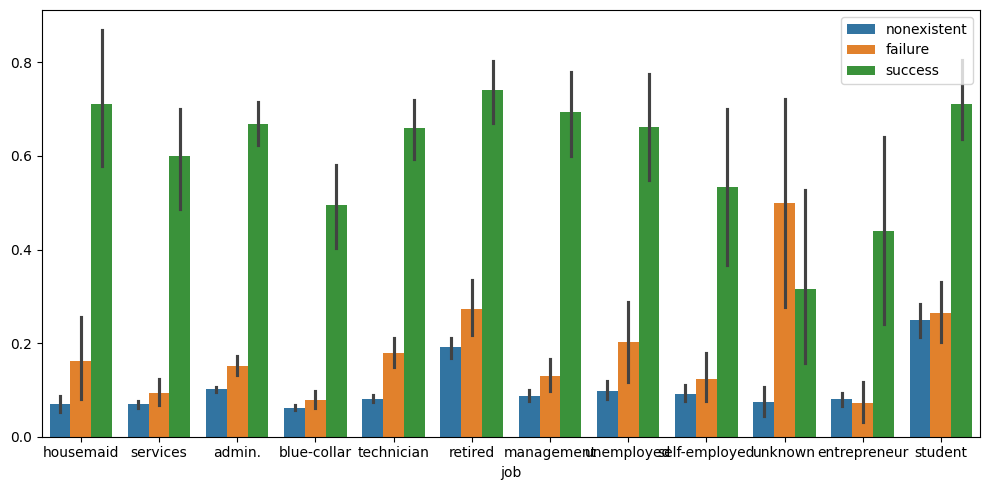

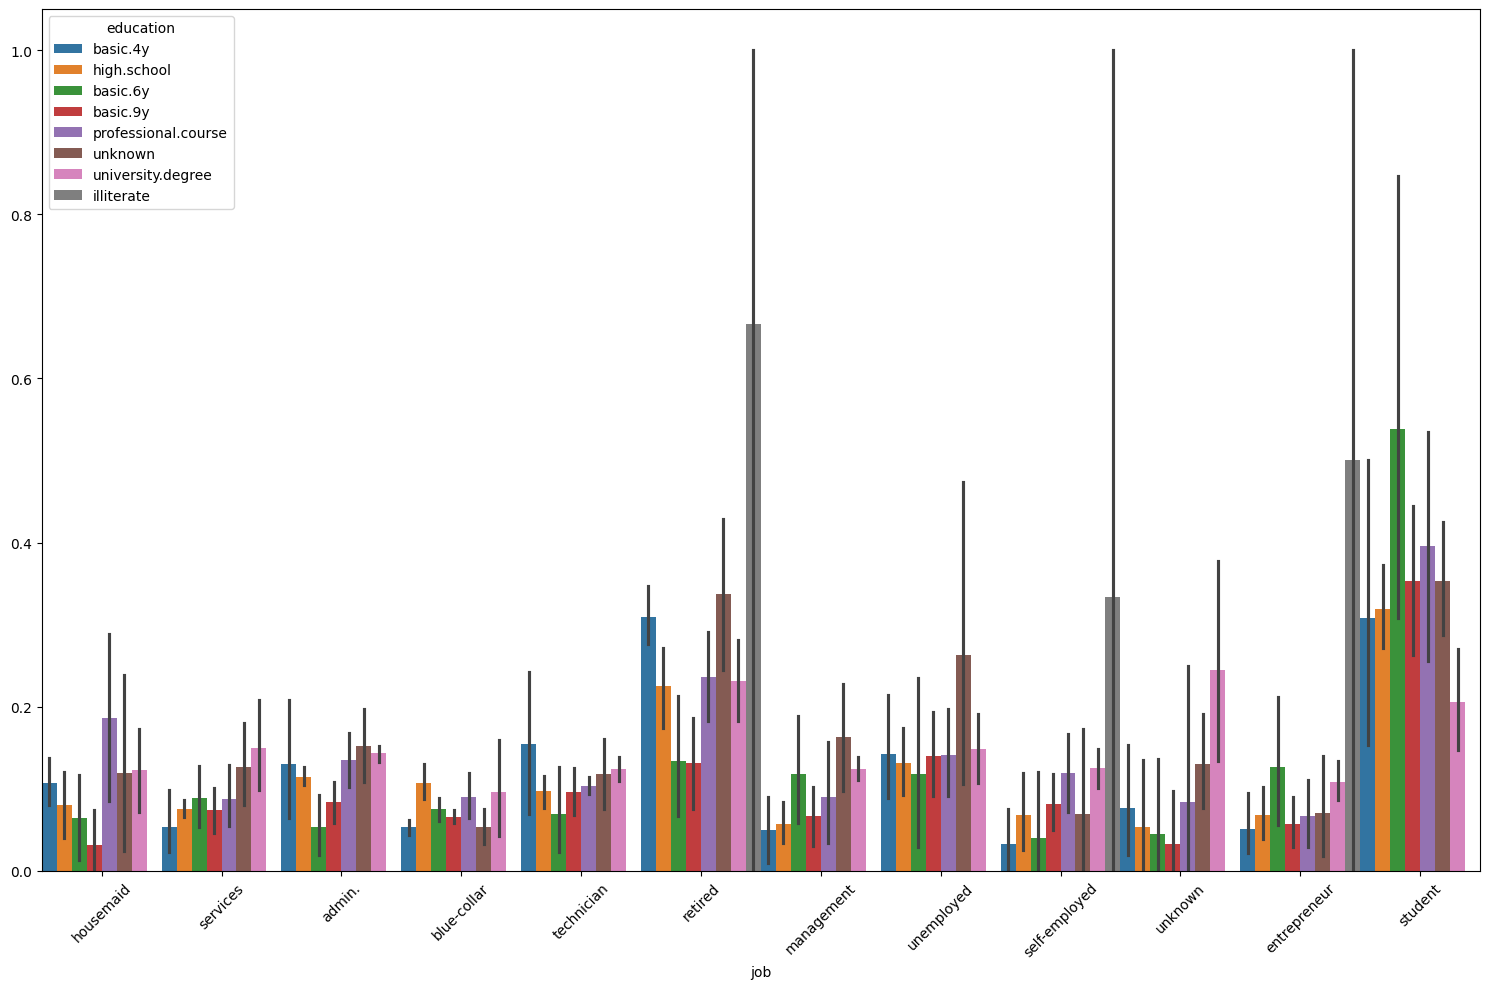

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


# Tu código original
fig, axis = plt.subplots(figsize=(10, 5))

sns.barplot(data=data_limpio, x="job", y=target_numeric, hue="poutcome").set(ylabel=None)

# Mover la leyenda dentro del gráfico (esquina superior derecha)
plt.legend(loc='upper right')

# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Crear la figura
plt.figure(figsize=(15, 10))

# Gráfico de barras con barras más gruesas
sns.barplot(data=data_limpio, x="job", y=target_numeric, hue="education", width=1)  # Ajusta el valor de "width"

# Rotar las etiquetas del eje x
plt.xticks(rotation=45)

# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()



In [ ]:


marital = data_limpio["marital"].unique().tolist()
day_of_week = data_limpio["day_of_week"].unique().tolist()
poutcome = data_limpio["poutcome"].unique().tolist()
default = data_limpio["default"].unique().tolist()
housing = data_limpio["housing"].unique().tolist()
loan = data_limpio["loan"].unique().tolist()
contact = data_limpio["contact"].unique().tolist()

marital_transformation_rules = {marital: idx for idx, marital in enumerate(marital)}
day_of_week_transformation_rules = {day_of_week: idx for idx, day_of_week in enumerate(day_of_week)}
poutcome_transformation_rules = {poutcome: idx for idx, poutcome in enumerate(poutcome)}
default_transformation_rules = {default: idx for idx, default in enumerate(default)}
housing_transformation_rules = {housing: idx for idx, housing in enumerate(housing)}
loan_transformation_rules = {loan: idx for idx, loan in enumerate(loan)}
contact_transformation_rules = {contact: idx for idx, contact in enumerate(contact)}

with open("marital_transformation_rules.json", "w") as f:
    json.dump(marital_transformation_rules, f)
with open("neighbourhood_group_transformation_rules.json", "w") as f:
    json.dump(day_of_week_transformation_rules, f)
with open("day_of_week_transformation_rules.json", "w") as f:
    json.dump(poutcome_transformation_rules, f)
with open("poutcome_transformation_rules.json", "w") as f:
    json.dump(poutcome_transformation_rules, f)
with open("default_transformation_rules.json", "w") as f:
    json.dump(default_transformation_rules, f)
with open("housing_transformation_rules.json", "w") as f:
    json.dump(housing_transformation_rules, f)
with open("room_transformation_rules.json", "w") as f:
    json.dump(loan_transformation_rules, f)
with open("loan_transformation_rules.json", "w") as f:
    json.dump(contact_transformation_rules, f)
